#INFRARED UAV DETECTION ON THERMALUAV2UAV DATASET
##EXPERIMENTS WITH YOLOv5 AND YOLOv8
###AUTHOR: VOLTAN GABRIELE
####AFFILIATION: University of Udine - Department of Mathematics, Computer Science and Physics

In [ ]:
!pip install pylabel
!pip install ultralytics
import os
import shutil
import json
import cv2
import yaml
import random
import glob

from ultralytics import YOLO
from pylabel import importer
from IPython.display import Image, display, clear_output

clear_output()

#Importing the ThermalUAV2UAV dataset

In [ ]:
!git clone https://github.com/GabryV00/ThermalUAV2UAV_Dataset.git

Cloning into 'ThermalUAV2UAV_Dataset'...
remote: Enumerating objects: 7113, done.
remote: Total 7113 (delta 0), reused 0 (delta 0), pack-reused 7113
Receiving objects: 100% (7113/7113), 984.96 MiB | 13.60 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (7715/7715), done.


##Removal of empty labels

In [ ]:
elenco_label = sorted(os.listdir("/content/ThermalUAV2UAV_Dataset/test/labels/"))
for lab in elenco_label:
  if os.stat("/content/ThermalUAV2UAV_Dataset/test/labels/" + lab).st_size == 0:
    os.remove("/content/ThermalUAV2UAV_Dataset/test/labels/" + lab)

elenco_label = sorted(os.listdir("/content/ThermalUAV2UAV_Dataset/train/labels/"))
for lab in elenco_label:
  if os.stat("/content/ThermalUAV2UAV_Dataset/train/labels/" + lab).st_size == 0:
    os.remove("/content/ThermalUAV2UAV_Dataset/train/labels/" + lab)

elenco_label = sorted(os.listdir("/content/ThermalUAV2UAV_Dataset/val/labels/"))
for lab in elenco_label:
  if os.stat("/content/ThermalUAV2UAV_Dataset/val/labels/" + lab).st_size == 0:
    os.remove("/content/ThermalUAV2UAV_Dataset/val/labels/" + lab)


#Creating the .yaml file for YOLO

In [ ]:
dict_ = {"names" : ["UAV"],"nc" : 1, "train" : "/content/ThermalUAV2UAV_Dataset/train/images", "val" : "/content/ThermalUAV2UAV_Dataset/val/images", "test": "/content/ThermalUAV2UAV_Dataset/test/images"}
with open(r'/content/ThermalUAV2UAV_Dataset/dataset.yaml', 'w') as file:
    documents = yaml.dump(dict_, file)

#YOLOv5


In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!pip install -U -r requirements.txt
!pip install pycocotools>=2.0 seaborn>=0.11.0 pandas thop
!pip install numpy==1.23.0
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99
clear_output()

##20 EPOCHS - SMALL YOLO

In [ ]:
!python train.py --img 640 --rect --batch 16 --epochs 20 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache --name ep20small

2023-10-10 07:36:30.369228: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 07:36:31.879849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=True, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=ep20small, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=

In [ ]:
!python val.py --img 640 --batch 16 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --weights /content/yolov5/runs/train/ep20small/weights/best.pt --name ep20small

val: data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, weights=['/content/yolov5/runs/train/ep20small/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=ep20small, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/ThermalUAV2UAV_Dataset/val/labels.cache' images and labels... 646 found, 220 missing, 0 empty, 0 corrupt: 100% 866/866 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   2% 1/55 [00:00<00:37,  1.42it/s]Exception in thread Thread-3 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _

###METRICS ON TEST SET

In [ ]:
!python val.py --img 640 --batch 16 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --weights /content/yolov5/runs/train/ep20small/weights/best.pt --name TESTep20small --task test

val: data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, weights=['/content/yolov5/runs/train/ep20small/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=TESTep20small, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/ThermalUAV2UAV_Dataset/test/labels' images and labels...324 found, 152 missing, 0 empty, 0 corrupt: 100% 476/476 [00:01<00:00, 279.22it/s]
test: New cache created: /content/ThermalUAV2UAV_Dataset/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   3% 1/30 [00:01<00:32,  1.11s/it]Exception in thread Thread-6 (plot_images):
Traceback

##30 EPOCHS - SMALL YOLO

In [ ]:
!python train.py --img 640 --rect --batch 16 --epochs 30 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache --name ep30small

2023-10-10 07:54:08.303088: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 07:54:10.772219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=True, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=ep30small, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=

In [ ]:
!python val.py --img 640 --batch 16 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --weights /content/yolov5/runs/train/ep30small/weights/best.pt --name ep30small

val: data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, weights=['/content/yolov5/runs/train/ep30small/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=ep30small, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/ThermalUAV2UAV_Dataset/val/labels.cache' images and labels... 646 found, 220 missing, 0 empty, 0 corrupt: 100% 866/866 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   2% 1/55 [00:00<00:48,  1.12it/s]Exception in thread Thread-3 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _

###METRICS ON TEST SET

In [ ]:
!python val.py --img 640 --batch 16 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --weights /content/yolov5/runs/train/ep30small/weights/best.pt --name TESTep30small --task test

val: data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, weights=['/content/yolov5/runs/train/ep30small/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=TESTep30small, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/ThermalUAV2UAV_Dataset/test/labels.cache' images and labels... 324 found, 152 missing, 0 empty, 0 corrupt: 100% 476/476 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   3% 1/30 [00:00<00:17,  1.63it/s]Exception in thread Thread-3 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 101

##DETECTING ON TEST SET with different conf's values

In [ ]:
!python3 detect.py --source '/content/ThermalUAV2UAV_Dataset/test/images' --weights '/content/yolov5/runs/train/ep30small/weights/best.pt' --conf 0.5 --iou 0.45 --augment --name 'ep30small_conf05'

detect: weights=['/content/yolov5/runs/train/ep30small/weights/best.pt'], source=/content/ThermalUAV2UAV_Dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=ep30small_conf05, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/476 /content/ThermalUAV2UAV_Dataset/test/images/01084.png: 512x640 1 UAV, Done. (0.268s)
image 2/476 /content/ThermalUAV2UAV_Dataset/test/images/01086.png: 512x640 Done. (0.048s)
image 3/476 /content/ThermalUAV2UAV_Dataset/test/images/01093.png: 512x640 Done. (0.042s)
image 4/476 /content/The

In [ ]:
!python3 detect.py --source '/content/ThermalUAV2UAV_Dataset/test/images' --weights '/content/yolov5/runs/train/ep30small/weights/best.pt' --conf 0.35 --iou 0.45 --augment --name 'ep30small_conf035'

detect: weights=['/content/yolov5/runs/train/ep30small/weights/best.pt'], source=/content/ThermalUAV2UAV_Dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=ep30small_conf035, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/476 /content/ThermalUAV2UAV_Dataset/test/images/01084.png: 512x640 1 UAV, Done. (0.155s)
image 2/476 /content/ThermalUAV2UAV_Dataset/test/images/01086.png: 512x640 Done. (0.024s)
image 3/476 /content/ThermalUAV2UAV_Dataset/test/images/01093.png: 512x640 Done. (0.024s)
image 4/476 /content/T

In [ ]:
!python3 detect.py --source '/content/ThermalUAV2UAV_Dataset/test/images' --weights '/content/yolov5/runs/train/ep30small/weights/best.pt' --conf 0.25 --iou 0.45 --augment --name 'ep30small_conf025'

detect: weights=['/content/yolov5/runs/train/ep30small/weights/best.pt'], source=/content/ThermalUAV2UAV_Dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=ep30small_conf025, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/476 /content/ThermalUAV2UAV_Dataset/test/images/01084.png: 512x640 1 UAV, Done. (0.157s)
image 2/476 /content/ThermalUAV2UAV_Dataset/test/images/01086.png: 512x640 Done. (0.025s)
image 3/476 /content/ThermalUAV2UAV_Dataset/test/images/01093.png: 512x640 Done. (0.024s)
image 4/476 /content/T

##ZIP RESULTS TO SAVE THEM

In [ ]:
!zip -r /content/runs_results_small.zip /content/yolov5/runs

  adding: content/yolov5/runs/ (stored 0%)
  adding: content/yolov5/runs/val/ (stored 0%)
  adding: content/yolov5/runs/val/TESTep30small/ (stored 0%)
  adding: content/yolov5/runs/val/TESTep30small/R_curve.png (deflated 19%)
  adding: content/yolov5/runs/val/TESTep30small/PR_curve.png (deflated 28%)
  adding: content/yolov5/runs/val/TESTep30small/F1_curve.png (deflated 17%)
  adding: content/yolov5/runs/val/TESTep30small/P_curve.png (deflated 21%)
  adding: content/yolov5/runs/val/TESTep30small/confusion_matrix.png (deflated 41%)
  adding: content/yolov5/runs/val/ep30small/ (stored 0%)
  adding: content/yolov5/runs/val/ep30small/R_curve.png (deflated 20%)
  adding: content/yolov5/runs/val/ep30small/PR_curve.png (deflated 27%)
  adding: content/yolov5/runs/val/ep30small/F1_curve.png (deflated 17%)
  adding: content/yolov5/runs/val/ep30small/P_curve.png (deflated 21%)
  adding: content/yolov5/runs/val/ep30small/confusion_matrix.png (deflated 41%)
  adding: content/yolov5/runs/val/TESTep

##20 EPOCHS - LARGE YOLO

In [ ]:
!python train.py --img 640 --rect --batch 16 --epochs 20 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --cfg models/yolov5l.yaml --weights yolov5l.pt --cache --name ep20large

In [ ]:
!python val.py --img 640 --batch 16 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --weights /content/yolov5/runs/train/ep20large/weights/best.pt --name ep20large

###METRICS ON TEST SET

In [ ]:
!python val.py --img 640 --batch 16 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --weights /content/yolov5/runs/train/ep20large/weights/best.pt --name TESTep20large --task test

##30 EPOCHS - LARGE YOLO

In [ ]:
!python train.py --img 640 --rect --batch 16 --epochs 30 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --cfg models/yolov5l.yaml --weights yolov5l.pt --cache --name ep30large

2023-10-10 10:54:44.506655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 10:54:46.486297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5l.pt, cfg=models/yolov5l.yaml, data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=True, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=ep30large, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, loc

In [ ]:
!python val.py --img 640 --batch 16 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --weights /content/yolov5/runs/train/ep30large/weights/best.pt --name ep30large

val: data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, weights=['/content/yolov5/runs/train/ep30large/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=ep30large, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
val: Scanning '/content/ThermalUAV2UAV_Dataset/val/labels.cache' images and labels... 646 found, 220 missing, 0 empty, 0 corrupt: 100% 866/866 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   2% 1/55 [00:00<00:48,  1.12it/s]Exception in thread Thread-3 (plot_images):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in

###METRICS ON TEST SET

In [ ]:
!python val.py --img 640 --batch 16 --data /content/ThermalUAV2UAV_Dataset/dataset.yaml --weights /content/yolov5/runs/train/ep30large/weights/best.pt --name TESTep30large --task test

val: data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, weights=['/content/yolov5/runs/train/ep30large/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=TESTep30large, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
test: Scanning '/content/ThermalUAV2UAV_Dataset/test/labels' images and labels...324 found, 152 missing, 0 empty, 0 corrupt: 100% 476/476 [00:01<00:00, 302.44it/s]
test: New cache created: /content/ThermalUAV2UAV_Dataset/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   3% 1/30 [00:01<00:34,  1.20s/it]Exception in thread Thread-6 (plot_images):
Traceba

In [ ]:
!python3 detect.py --source '/content/ThermalUAV2UAV_Dataset/test/images' --weights '/content/yolov5/runs/train/ep30large/weights/best.pt' --conf 0.5 --iou 0.45 --augment --name 'ep30large_conf05'

detect: weights=['/content/yolov5/runs/train/ep30large/weights/best.pt'], source=/content/ThermalUAV2UAV_Dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=ep30large_conf05, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/476 /content/ThermalUAV2UAV_Dataset/test/images/01084.png: 512x640 1 UAV, Done. (0.181s)
image 2/476 /content/ThermalUAV2UAV_Dataset/test/images/01086.png: 512x640 Done. (0.088s)
image 3/476 /content/ThermalUAV2UAV_Dataset/test/images/01093.png: 512x640 1 UAV, Done. (0.078s)
image 4/476 /co

In [ ]:
!python3 detect.py --source '/content/ThermalUAV2UAV_Dataset/test/images' --weights '/content/yolov5/runs/train/ep30large/weights/best.pt' --conf 0.35 --iou 0.45 --augment --name 'ep30large_conf035'

detect: weights=['/content/yolov5/runs/train/ep30large/weights/best.pt'], source=/content/ThermalUAV2UAV_Dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=ep30large_conf035, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/476 /content/ThermalUAV2UAV_Dataset/test/images/01084.png: 512x640 1 UAV, Done. (0.160s)
image 2/476 /content/ThermalUAV2UAV_Dataset/test/images/01086.png: 512x640 Done. (0.081s)
image 3/476 /content/ThermalUAV2UAV_Dataset/test/images/01093.png: 512x640 1 UAV, Done. (0.058s)
image 4/476 /

In [ ]:
!python3 detect.py --source '/content/ThermalUAV2UAV_Dataset/test/images' --weights '/content/yolov5/runs/train/ep30large/weights/best.pt' --conf 0.25 --iou 0.45 --augment --name 'ep30large_conf025'

detect: weights=['/content/yolov5/runs/train/ep30large/weights/best.pt'], source=/content/ThermalUAV2UAV_Dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=ep30large_conf025, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/476 /content/ThermalUAV2UAV_Dataset/test/images/01084.png: 512x640 1 UAV, Done. (0.164s)
image 2/476 /content/ThermalUAV2UAV_Dataset/test/images/01086.png: 512x640 Done. (0.065s)
image 3/476 /content/ThermalUAV2UAV_Dataset/test/images/01093.png: 512x640 1 UAV, Done. (0.064s)
image 4/476 /

In [ ]:
!zip -r /content/runs_results_large.zip /content/yolov5/runs

  adding: content/yolov5/runs/ (stored 0%)
  adding: content/yolov5/runs/val/ (stored 0%)
  adding: content/yolov5/runs/val/TESTep30large/ (stored 0%)
  adding: content/yolov5/runs/val/TESTep30large/R_curve.png (deflated 19%)
  adding: content/yolov5/runs/val/TESTep30large/PR_curve.png (deflated 30%)
  adding: content/yolov5/runs/val/TESTep30large/F1_curve.png (deflated 17%)
  adding: content/yolov5/runs/val/TESTep30large/P_curve.png (deflated 21%)
  adding: content/yolov5/runs/val/TESTep30large/confusion_matrix.png (deflated 41%)
  adding: content/yolov5/runs/val/ep30large/ (stored 0%)
  adding: content/yolov5/runs/val/ep30large/R_curve.png (deflated 20%)
  adding: content/yolov5/runs/val/ep30large/PR_curve.png (deflated 28%)
  adding: content/yolov5/runs/val/ep30large/F1_curve.png (deflated 17%)
  adding: content/yolov5/runs/val/ep30large/P_curve.png (deflated 21%)
  adding: content/yolov5/runs/val/ep30large/confusion_matrix.png (deflated 40%)
  adding: content/yolov5/runs/train/ (st

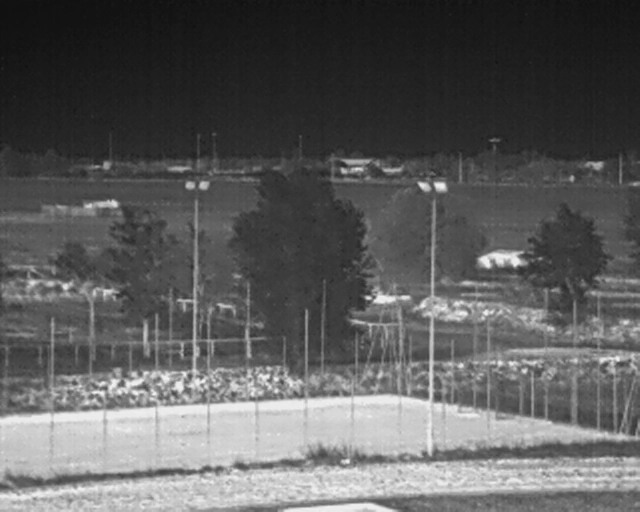

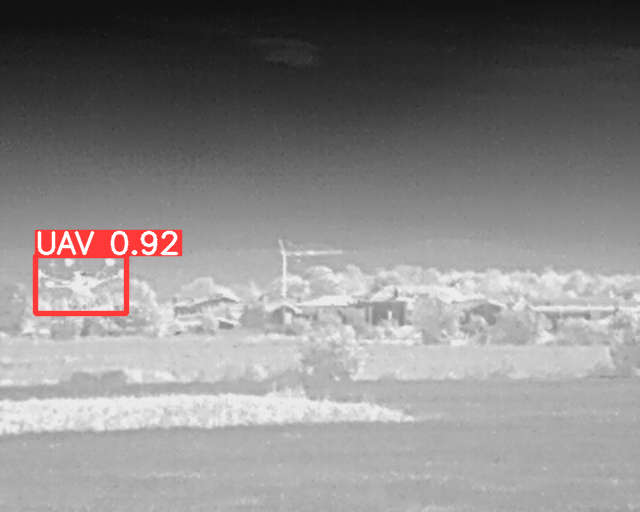

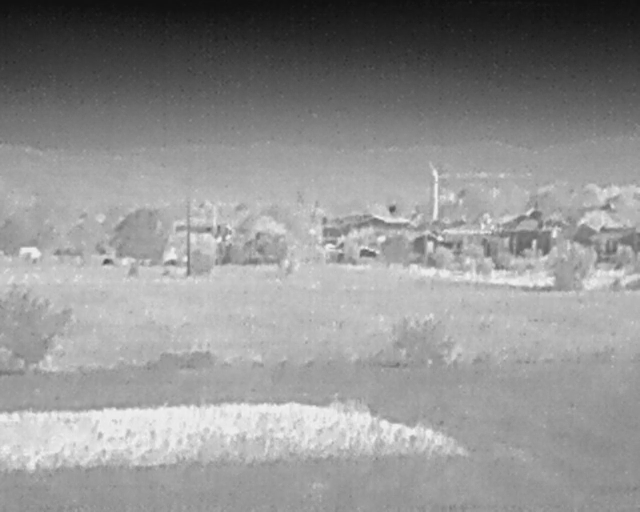

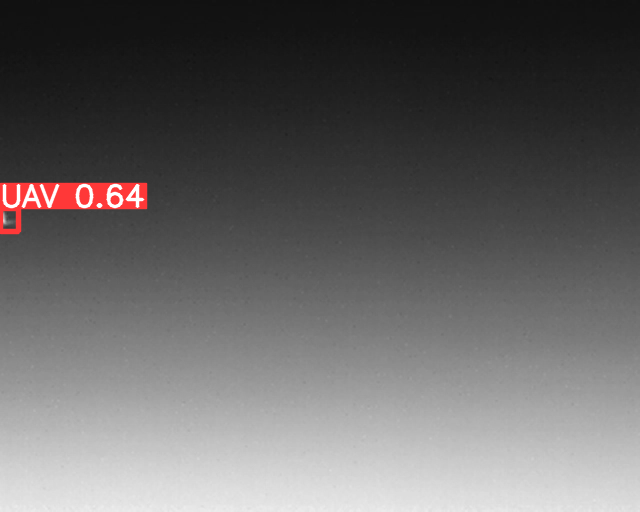

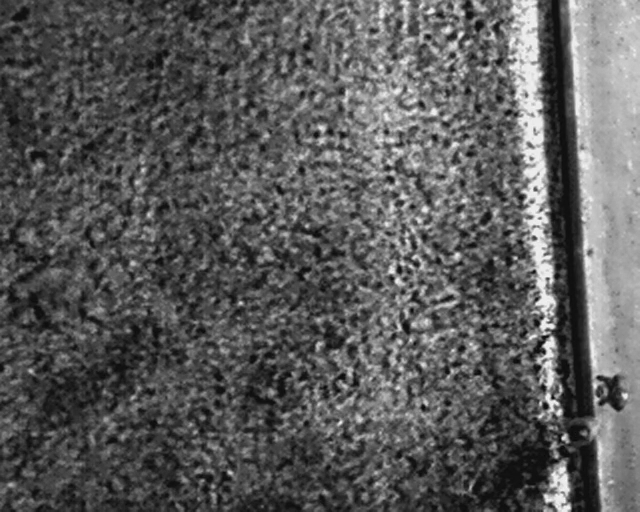

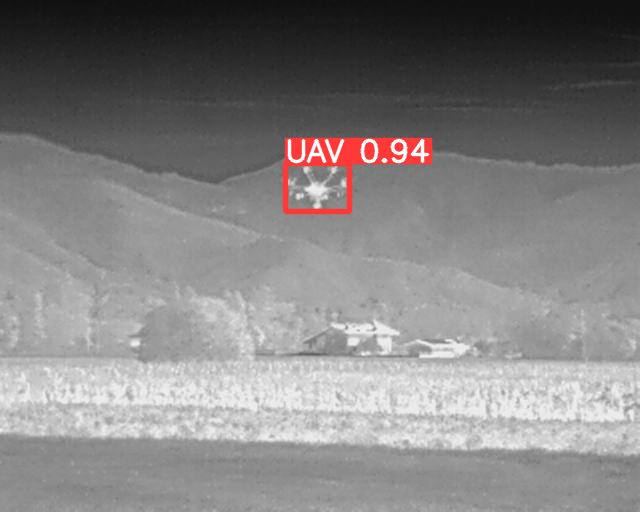

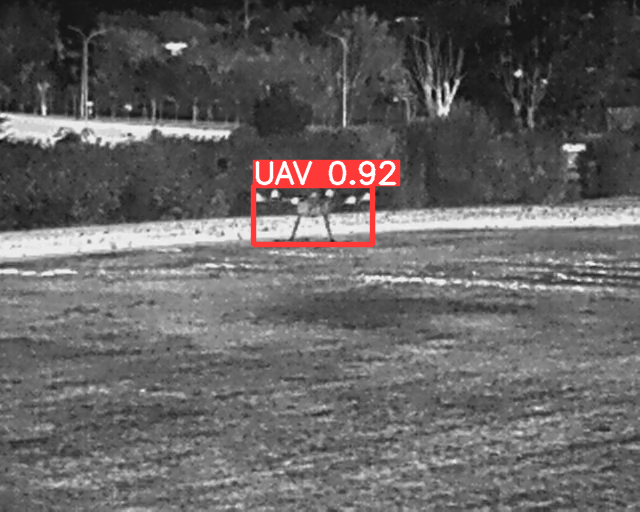

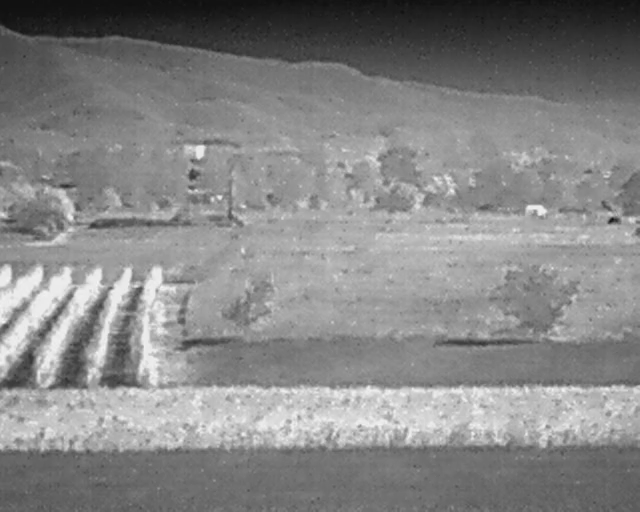

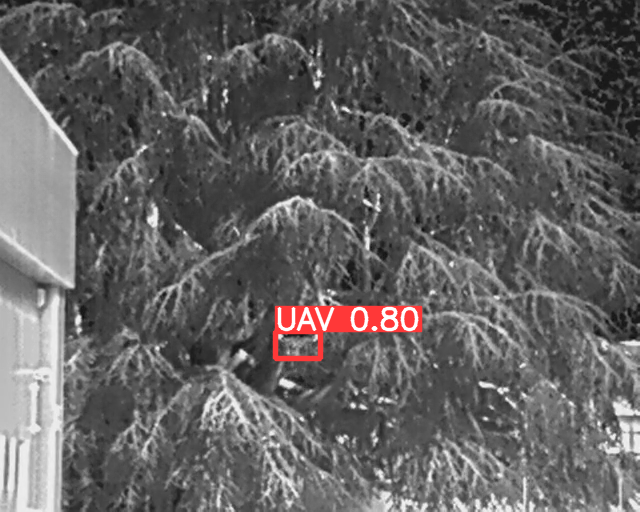

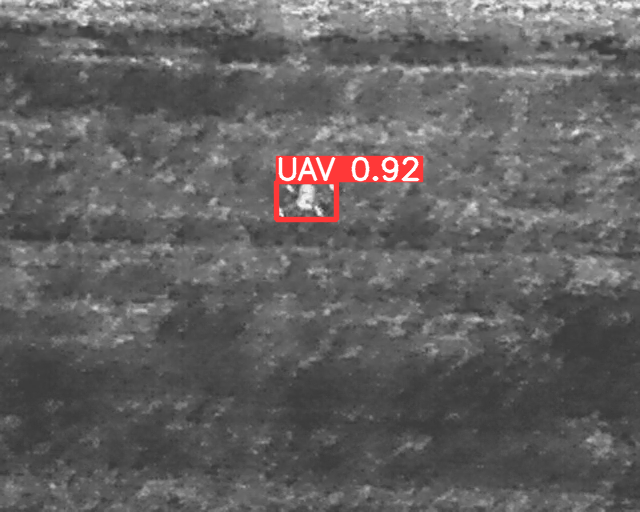

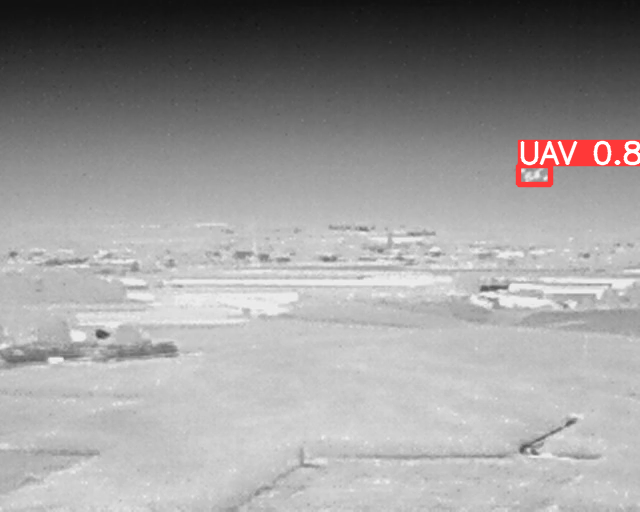

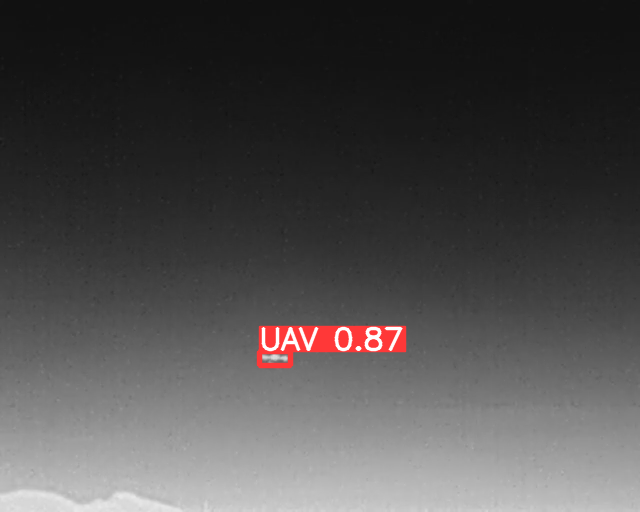

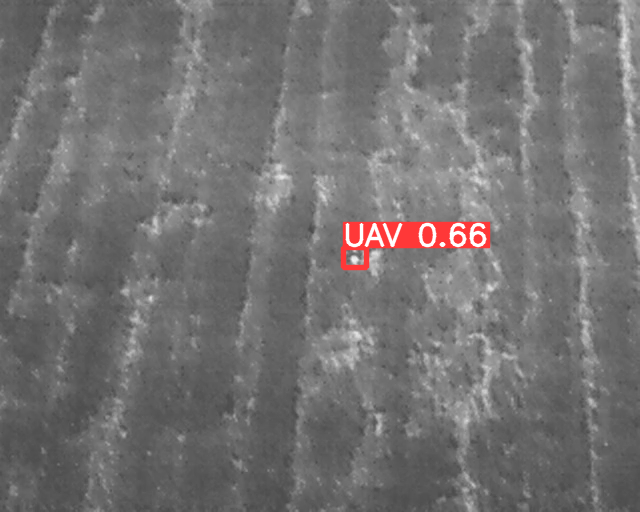

In [ ]:
for imageName in glob.glob('/content/yolov5/runs/detect/ep30large_conf05/*.png'):
    display(Image(filename=imageName))
    print("\n")

#YOLOv8

##20 EPOCHS - SMALL YOLO

In [ ]:
model = YOLO('yolov8s.pt')
results = model.train(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', epochs=20, imgsz=640, batch=16, save=True, rect=True)

100%|██████████| 21.5M/21.5M [00:00<00:00, 52.7MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, 

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
metrics = model.val(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', imgsz=640, batch=16, rect=True, split='val')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/ThermalUAV2UAV_Dataset/val/labels.cache... 646 images, 220 backgrounds, 0 corrupt: 100%|██████████| 866/866 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:14<00:00,  3.85it/s]
                   all        866        723       0.92       0.88       0.95      0.705
Speed: 1.1ms preprocess, 7.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val2


##METRICS ON TEST SET

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
metrics = model.val(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', imgsz=640, batch=16, rect=True, split='test')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/ThermalUAV2UAV_Dataset/test/labels... 324 images, 152 backgrounds, 0 corrupt: 100%|██████████| 476/476 [00:01<00:00, 444.87it/s]
val: New cache created: /content/ThermalUAV2UAV_Dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.57it/s]
                   all        476        363      0.899      0.871      0.938      0.685
Speed: 1.2ms preprocess, 8.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val


##30 EPOCHS - SMALL YOLO

In [ ]:
model = YOLO('yolov8s.pt')
results = model.train(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', epochs=30, imgsz=640, batch=16, save=True, rect=True)

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

In [ ]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')
metrics = model.val(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', imgsz=640, batch=16, rect=True, split='val')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/ThermalUAV2UAV_Dataset/val/labels.cache... 646 images, 220 backgrounds, 0 corrupt: 100%|██████████| 866/866 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:13<00:00,  4.15it/s]
                   all        866        723      0.908      0.939      0.964      0.747
Speed: 0.9ms preprocess, 7.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val3


##METRICS ON TEST SET

In [ ]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')
metrics = model.val(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', imgsz=640, batch=16, rect=True, split='test')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/ThermalUAV2UAV_Dataset/test/labels.cache... 324 images, 152 backgrounds, 0 corrupt: 100%|██████████| 476/476 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.46it/s]
                   all        476        363      0.889      0.934      0.955      0.726
Speed: 1.3ms preprocess, 7.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val4


##20 EPOCHS - LARGE YOLO

In [ ]:
model = YOLO('yolov8l.pt')
results = model.train(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', epochs=20, imgsz=640, batch=16, save=True, rect=True)

100%|██████████| 83.7M/83.7M [00:01<00:00, 48.4MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, 

In [ ]:
model = YOLO('/content/runs/detect/train3/weights/best.pt')
metrics = model.val(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', imgsz=640, batch=16, rect=True, split='val')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/ThermalUAV2UAV_Dataset/val/labels.cache... 646 images, 220 backgrounds, 0 corrupt: 100%|██████████| 866/866 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                   all        866        723      0.894      0.831      0.902      0.664
Speed: 1.2ms preprocess, 31.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val5


##METRICS ON TEST SET

In [ ]:
model = YOLO('/content/runs/detect/train3/weights/best.pt')
metrics = model.val(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', imgsz=640, batch=16, rect=True, split='test')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/ThermalUAV2UAV_Dataset/test/labels.cache... 324 images, 152 backgrounds, 0 corrupt: 100%|██████████| 476/476 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.65it/s]
                   all        476        363      0.854      0.806      0.883      0.638
Speed: 0.8ms preprocess, 30.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val6


##30 EPOCHS - LARGE YOLO

In [ ]:
model = YOLO('yolov8l.pt')
results = model.train(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', epochs=30, imgsz=640, batch=16, save=True, rect=True)

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/ThermalUAV2UAV_Dataset/dataset.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

In [ ]:
model = YOLO('/content/runs/detect/train4/weights/best.pt')
metrics = model.val(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', imgsz=640, batch=16, rect=True, split='val')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/ThermalUAV2UAV_Dataset/val/labels.cache... 646 images, 220 backgrounds, 0 corrupt: 100%|██████████| 866/866 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                   all        866        723      0.932      0.889      0.944      0.713
Speed: 0.8ms preprocess, 32.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val7


##METRICS ON TEST SET

In [ ]:
model = YOLO('/content/runs/detect/train4/weights/best.pt')
metrics = model.val(data='/content/ThermalUAV2UAV_Dataset/dataset.yaml', imgsz=640, batch=16, rect=True, split='test')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/ThermalUAV2UAV_Dataset/test/labels.cache... 324 images, 152 backgrounds, 0 corrupt: 100%|██████████| 476/476 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:16<00:00,  1.86it/s]
                   all        476        363      0.908      0.873      0.927       0.69
Speed: 1.3ms preprocess, 27.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val8


##ZIP RESULTS TO SAVE THEM

In [ ]:
!zip -r /content/runs_results_yolo8.zip /content/runs/detect

  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 11%)
  adding: content/runs/detect/train2/val_batch1_pred.jpg (deflated 11%)
  adding: content/runs/detect/train2/confusion_matrix_normalized.png (deflated 38%)
  adding: content/runs/detect/train2/args.yaml (deflated 50%)
  adding: content/runs/detect/train2/weights/ (stored 0%)
  adding: content/runs/detect/train2/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train2/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train2/train_batch0.jpg (deflated 12%)
  adding: content/runs/detect/train2/val_batch2_pred.jpg (deflated 9%)
  adding: content/runs/detect/train2/F1_curve.png (deflated 17%)
  adding: content/runs/detect/train2/PR_curve.png (deflated 25%)
  adding: content/runs/detect/train2/train_batch3161.jpg (deflated 17%)
  adding: content/runs/detect/train2/results.csv (deflated 84%)
  adding: content